In [41]:
import numpy as np
import pandas as pd
import sys
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
import math
sys.path.append('..\\custom_libraries')
import collections

# Custom library to analyze NC rate of deterioration
import rate_analysis
    
df = pd.read_csv('../../spreadsheet_data/i16WB_tag_replaced.csv')
avg_state = rate_analysis.calc_average_state_by_slab(df, '2014', 100)
df['avg_state'] = avg_state
det = rate_analysis.has_deteriorated(df, '2014', '2018')
df['deteriorated'] = det


In [42]:
initial_state_arr = np.array([])
avg_state_arr = np.array([])
det_arr = np.array([])
for year in range(2014, 2018):
    initial_states = df[str(year)].to_numpy()
    avg_state = rate_analysis.calc_average_state_by_slab(df, str(year), 1)
    det = rate_analysis.has_deteriorated(df, str(year), str(year+1))
    initial_state_arr = np.append(initial_state_arr, initial_states)
    avg_state_arr = np.append(avg_state_arr, avg_state)
    det_arr = np.append(det_arr, det)


avg_state_df = pd.DataFrame({'initial_state': initial_state_arr, 'avg_state': avg_state_arr, 'deteriorated': det_arr})


\begin{tabular}{llrr}
\toprule
{} &     x\_label &  chance &     n \\
\midrule
0 &  [0.0, 0.5) &    0.03 &  5653 \\
1 &  [0.5, 1.0) &    0.08 &   534 \\
2 &  [1.0, 1.5) &    0.10 &  1627 \\
3 &  [1.5, 2.0) &    0.15 &   537 \\
4 &  [2.0, 2.5) &    0.13 &   369 \\
5 &  [2.5, 3.0) &    0.14 &   196 \\
6 &  [3.0, 3.5) &    0.20 &    80 \\
\bottomrule
\end{tabular}



C:\Users\jaden\AppData\Local\Temp\ipykernel_22456\2848556430.py:30: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_df.round(2).to_latex())


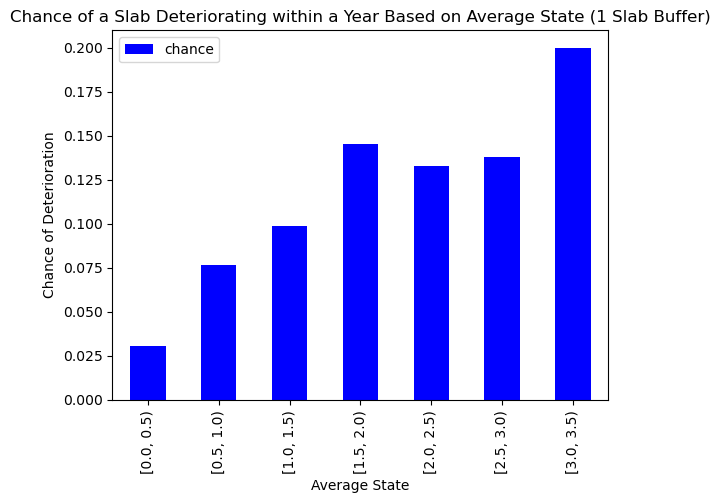

In [43]:
avg_state_df = avg_state_df[avg_state_df['initial_state'] != 'SS']
avg_state_df = avg_state_df[avg_state_df['initial_state'] != 'R']
avg_state_df = avg_state_df[avg_state_df['initial_state'] != 'B']

def plot_bar_chart(df, title, included_slabs, highest_state):
    df = df[df['initial_state'].isin(included_slabs)]
    groupings = {}
    chance = []
    x_label = []
    n = []
    groups = math.ceil(highest_state * 2) + 1
    xs = [x * .5 for x in range(groups)]
    for i in xs:
        groupings[i] = df[(df['avg_state'] >= i) & (df['avg_state'] < i+.5)]
        if len(groupings[i]) == 0:
            chance.append(0)
        else:
            chance.append(len(groupings[i][groupings[i]['deteriorated'] == True])/len(groupings[i]))
        x_label.append('[' + str(i) + ', ' + str(i+.5) + ')')
    
        n.append(len(groupings[i]))
    combined_df = pd.DataFrame({ 'x_label': x_label, 'chance': chance, 'n': n})
    combined_df.plot(kind='bar', x='x_label', y='chance', title=title, color='blue')

    plt.xlabel('Average State')
    plt.ylabel('Chance of Deterioration')
    return combined_df

all_df = plot_bar_chart(avg_state_df, 'Chance of a Slab Deteriorating within a Year Based on Average State (1 Slab Buffer)', {'NC', 'L1', 'T1', 'L2', 'T2', 'CC'}, 3)
print(all_df.round(2).to_latex())

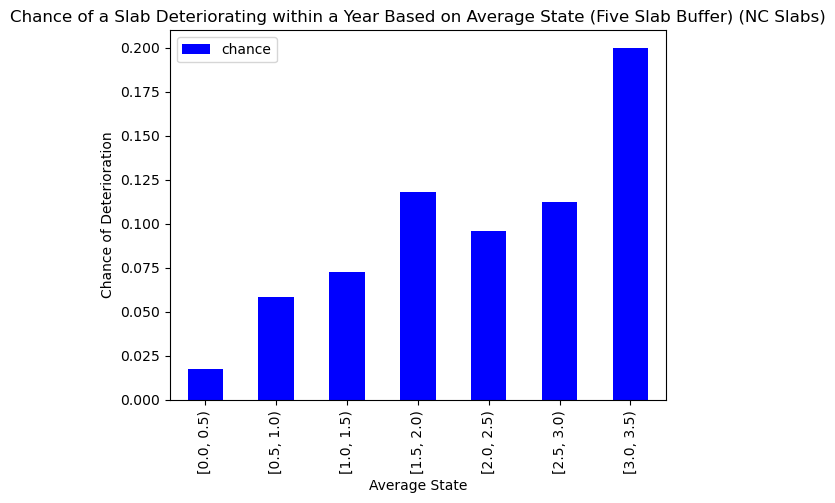

In [44]:
nc_df = plot_bar_chart(avg_state_df, 'Chance of a Slab Deteriorating within a Year Based on Average State (Five Slab Buffer) (NC Slabs)', {'NC'}, 3)

\begin{tabular}{llrr}
\toprule
{} &     x\_label &    chance &    n \\
\midrule
0 &  [0.0, 0.5) &  0.359116 &  181 \\
1 &  [0.5, 1.0) &  0.238095 &   42 \\
2 &  [1.0, 1.5) &  0.373016 &  126 \\
3 &  [1.5, 2.0) &  0.581395 &   43 \\
4 &  [2.0, 2.5) &  0.650000 &   20 \\
5 &  [2.5, 3.0) &  0.833333 &    6 \\
6 &  [3.0, 3.5) &  1.000000 &    4 \\
\bottomrule
\end{tabular}



C:\Users\jaden\AppData\Local\Temp\ipykernel_22456\2789249175.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(md_df.to_latex())


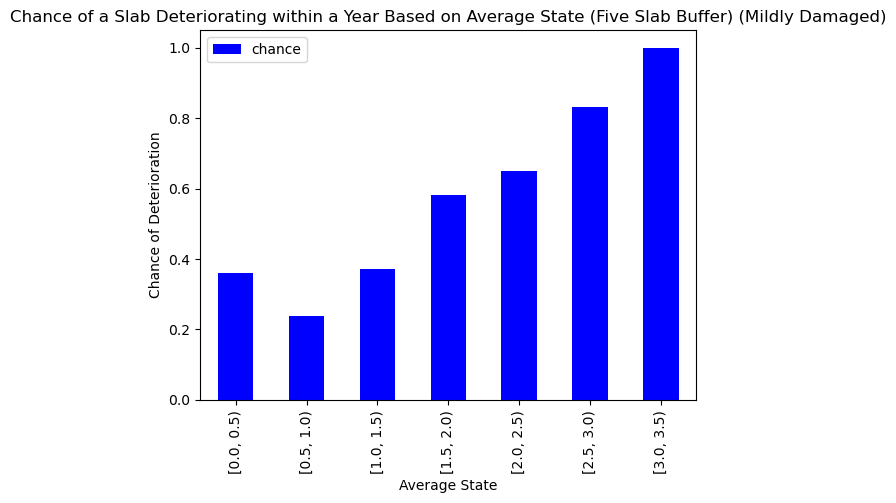

In [45]:
md_df = plot_bar_chart(avg_state_df, 'Chance of a Slab Deteriorating within a Year Based on Average State (Five Slab Buffer) (Mildly Damaged)', {'T1', 'L1'}, 3)
print(md_df.to_latex())

\begin{tabular}{llrr}
\toprule
{} &     x\_label &  chance &    n \\
\midrule
0 &  [0.0, 0.5) &    0.07 &  246 \\
1 &  [0.5, 1.0) &    0.09 &   66 \\
2 &  [1.0, 1.5) &    0.09 &  396 \\
3 &  [1.5, 2.0) &    0.08 &  156 \\
4 &  [2.0, 2.5) &    0.11 &  161 \\
5 &  [2.5, 3.0) &    0.12 &  110 \\
6 &  [3.0, 3.5) &    0.12 &   41 \\
\bottomrule
\end{tabular}



C:\Users\jaden\AppData\Local\Temp\ipykernel_22456\4040781287.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(critical_df.to_latex())


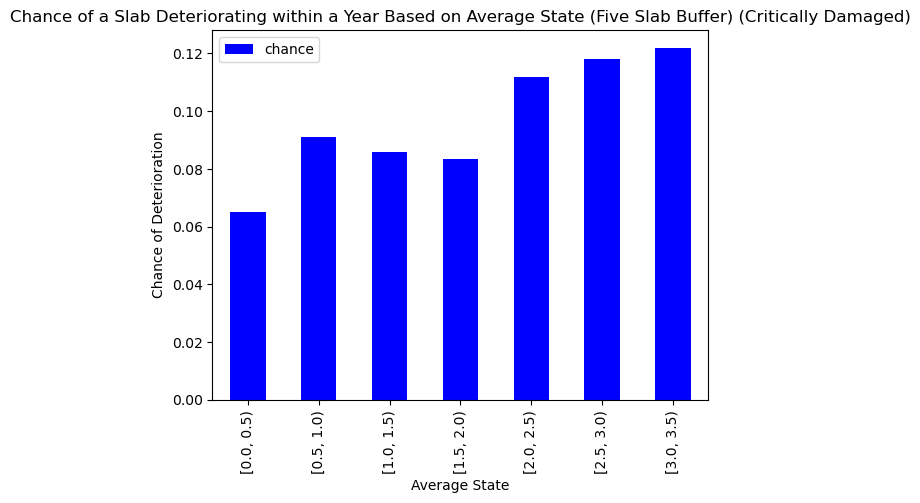

In [46]:
critical_df = plot_bar_chart(avg_state_df, 'Chance of a Slab Deteriorating within a Year Based on Average State (Five Slab Buffer) (Critically Damaged)', {'T2', 'L2', 'CC'}, 3)
critical_df = critical_df.round(2)
print(critical_df.to_latex())

,x_label,chance,n
0,"[0.0, 0.5)",0.206522,184
1,"[0.5, 1.0)",0.209302,43
2,"[1.0, 1.5)",0.128472,288
3,"[1.5, 2.0)",0.186916,107
4,"[2.0, 2.5)",0.176471,119
5,"[2.5, 3.0)",0.171053,76
6,"[3.0, 3.5)",0.228571,35


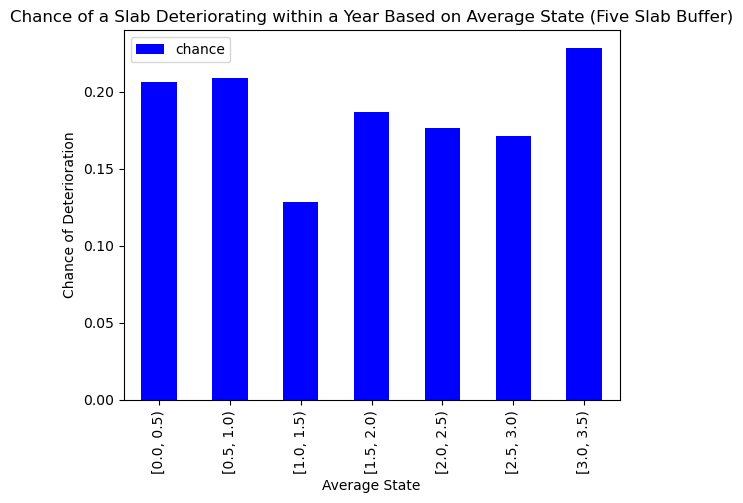

In [47]:
plot_bar_chart(avg_state_df, 'Chance of a Slab Deteriorating within a Year Based on Average State (Five Slab Buffer)', {'T2', 'T1'}, 3)    

,x_label,chance,n
0,"[0.0, 0.5)",0.208122,197
1,"[0.5, 1.0)",0.122807,57
2,"[1.0, 1.5)",0.201031,194
3,"[1.5, 2.0)",0.278689,61
4,"[2.0, 2.5)",0.157895,38
5,"[2.5, 3.0)",0.166667,18
6,"[3.0, 3.5)",0.250000,4


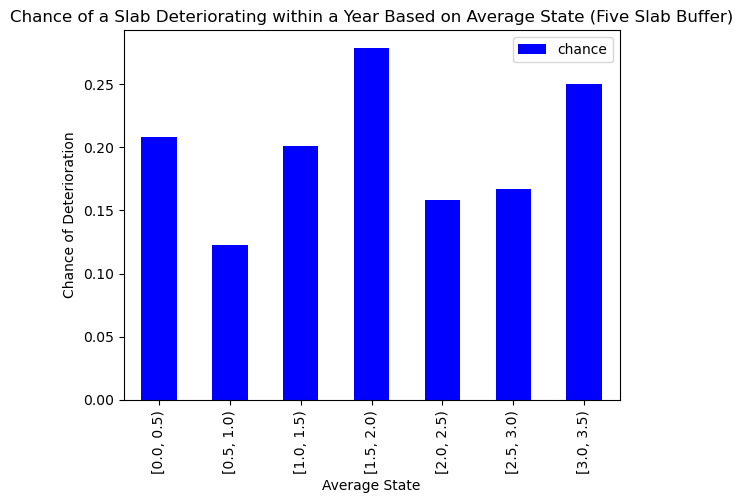

In [48]:
plot_bar_chart(avg_state_df, 'Chance of a Slab Deteriorating within a Year Based on Average State (Five Slab Buffer)', {'L1', 'L2'}, 3)